# Surprise Housing

## Exploratory Data Analysis

Import the required libraries

In [1502]:
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import numpy as np


# Hide warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

Read the csv file

In [1503]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
housing = pd.read_csv("train.csv")

In [1504]:
housing.shape

(1460, 81)

In [1505]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [1506]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

MSSubClass is actually of categorical in nature so we convert them to string.

**Note:** **OverallQual** and **OverallCond** are also categorical in nature however since they are ordinal we leave them as numeric columns

In [1507]:
housing["MSSubClass"] = housing["MSSubClass"].astype(str)

## Data Cleaning

Dropping the Id Column as it is metadata and not a feature

In [1508]:
housing.drop("Id", inplace=True, axis=1)

Dropping a few variables that we think are insignificant to the output variable

In [1509]:
housing.drop(['GarageYrBlt', 'MoSold', 'YearRemodAdd'], inplace=True, axis=1)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave   NaN      Reg         Lvl   
1         20       RL         80.0     9600   Pave   NaN      Reg         Lvl   
2         60       RL         68.0    11250   Pave   NaN      IR1         Lvl   
3         70       RL         60.0     9550   Pave   NaN      IR1         Lvl   
4         60       RL         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt RoofStyle RoofMatl  \
0     2Story            7            5       2003     Gable  CompShg   
1     1Story            6            8       1976     Gable  CompShg   
2     2Story            7            5       2001     Gable  CompShg   
3     2Story            7            5       1915     Gable  CompShg   
4     2Story            8            5       2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4  

### Fixing null values

Checking the number of null values in the dataframe

In [1510]:
null_columns = housing.columns[housing.isnull().any()]
round(100 * housing[null_columns].isnull().sum()/ len(housing.index), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

As per the data dictionary some "NA" values should be interpreted as a "No" or "Not Present" and not a null value 

In [1511]:
housing["Alley"].fillna("None", inplace=True)
housing["BsmtQual"].fillna("None", inplace=True)
housing["BsmtCond"].fillna("None", inplace=True)
housing["BsmtExposure"].fillna("None", inplace=True)
housing["BsmtFinType1"].fillna("None", inplace=True)
housing["BsmtFinType2"].fillna("None", inplace=True)
housing["FireplaceQu"].fillna("None", inplace=True)
housing["GarageFinish"].fillna("None", inplace=True)
housing["GarageQual"].fillna("None", inplace=True)
housing["GarageCond"].fillna("None", inplace=True)
housing["GarageType"].fillna("None", inplace=True)
housing["PoolQC"].fillna("None", inplace=True)
housing["MiscFeature"].fillna("None", inplace=True)
housing["Fence"].fillna("None", inplace=True)

Imputing missing values

In [1512]:
# Imputing the value of the numerical variable with the median
housing["LotFrontage"].fillna(housing["LotFrontage"].median(), inplace=True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].median(), inplace=True)

# Imputing the value of the categorical variable with the mode
housing["MasVnrType"].fillna(housing["MasVnrType"].mode()[0], inplace=True)
housing["Electrical"].fillna(housing["Electrical"].mode()[0], inplace=True)

Checking the number of null values in the dataframe

In [1513]:
null_count = housing.columns[housing.isnull().any()]
round(100 * housing[null_count].isnull().sum()/ len(housing.index), 2)

Series([], dtype: float64)

There are no more null values present in the dataframe

Converting **ExterQual**, **ExterCond**, **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinType2**, **HeatingQC**, **KitchenQual**, **FireplaceQu**, **GarageFinish**, **GarageQual**, **GarageCond**, **PoolQC** to numeric values as the categorical variables are ordinal in nature

In [1514]:
housing = housing.replace({"ExterQual": {"Ex":0, "Gd":1, "TA":2, "Fa":3, "Po":4}})
housing = housing.replace({"ExterCond": {"Ex":0, "Gd":1, "TA":2, "Fa":3, "Po":4}})
housing = housing.replace({"BsmtQual": {"Ex":0, "Gd":1, "TA":2, "Fa":3, "Po":4, "None":5}})
housing = housing.replace({"BsmtCond": {"Ex":0, "Gd":1, "TA":2, "Fa":3, "Po":4, "None":5}})
housing = housing.replace({"BsmtExposure": {"Gd":0, "Av":1, "Mn":2, "No":3, "None":4}})
housing = housing.replace({"BsmtFinType1": {"GLQ":0, "ALQ":1, "BLQ":2, "Rec":3, "LwQ":4, "Unf":5, "None":6}})
housing = housing.replace({"BsmtFinType2": {"GLQ":0, "ALQ":1, "BLQ":2, "Rec":3, "LwQ":4, "Unf":5, "None":6}})
housing = housing.replace({"HeatingQC": {"Ex":0, "Gd":1, "TA":2, "Fa":3, "Po":4}})
housing = housing.replace({"KitchenQual": {"Ex":0, "Gd":1, "TA":2, "Fa":3, "Po":4}})
housing = housing.replace({"FireplaceQu": {"Ex":0, "Gd":1, "TA":2, "Fa":3, "Po":4, "None":5}})
housing = housing.replace({"GarageFinish": {"Fin":0, "RFn":1, "Unf":2, "None":3}})
housing = housing.replace({"GarageQual": {"Ex":0, "Gd":1, "TA":2, "Fa":3, "Po":4, "None":5}})
housing = housing.replace({"GarageCond": {"Ex":0, "Gd":1, "TA":2, "Fa":3, "Po":4, "None":5}})
housing = housing.replace({"PoolQC": {"Ex":0, "Gd":1, "TA":2, "Fa":3, "N":4}})

Creating a data frame for all the categorical features

In [1515]:
numeric = housing.select_dtypes(exclude=object)
print(numeric.shape)
numeric.head()

(1460, 46)


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
0         65.0     8450            7            5       2003       196.0   
1         80.0     9600            6            8       1976         0.0   
2         68.0    11250            7            5       2001       162.0   
3         60.0     9550            7            5       1915         0.0   
4         84.0    14260            8            5       2000       350.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          1          2         1         2             3             0   
1          2          2         1         2             0             1   
2          1          2         1         2             2             0   
3          2          2         2         1             3             1   
4          1          2         1         2             1             0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0         706             5           0        150          856          0   
1         978             5           0        284         1262          0   
2         486             5           0        434          920          0   
3         216             5           0        540          756          1   
4         655             5           0        490         1145          0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            1             8   
1         2         0             3             1            2             6   
2         2         1             3             1            1             6   
3         1         0             3             1            1             7   
4         2         1             4             1            1             9   

   Fireplaces  FireplaceQu  GarageFinish  GarageCars  GarageArea  GarageQual  \
0           0            5             1           2         548           2   
1           1            2             1           2         460           2   
2           1            2             1           2         608           2   
3           1            1             2           3         642           2   
4           1            2             1           3         836           2   

   GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           2           0           61              0          0            0   
1           2         298            0              0          0            0   
2           2           0           42              0          0            0   
3           2           0           35            272          0            0   
4           2         192           84              0          0            0   

   PoolArea  MiscVal  YrSold  SalePrice  
0         0        0    2008     208500  
1         0        0    2007     181500  
2         0        0    2008     223500  
3         0        0    2006     140000  
4         0        0    2008     250000

In [1516]:
categorical = housing.select_dtypes(include=object)
print(categorical.shape)
categorical.head()

(1460, 31)


MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType Foundation Heating CentralAir  \
0  CompShg     VinylSd     VinylSd    BrkFace      PConc    GasA          Y   
1  CompShg     MetalSd     MetalSd       None     CBlock    GasA          Y   
2  CompShg     VinylSd     VinylSd    BrkFace      PConc    GasA          Y   
3  CompShg     Wd Sdng     Wd Shng       None     BrkTil    GasA          Y   
4  CompShg     VinylSd     VinylSd    BrkFace      PConc    GasA          Y   

  Electrical Functional GarageType PavedDrive PoolQC Fence MiscFeature  \
0      SBrkr        Typ     Attchd          Y   None  None        None   
1      SBrkr        Typ     Attchd          Y   None  None        None   
2      SBrkr        Typ     Attchd          Y   None  None        None   
3      SBrkr        Typ     Detchd          Y   None  None        None   
4      SBrkr        Typ     Attchd          Y   None  None        None   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

Visualizing the numerical variables

In [1517]:
cor = numeric.corr()
cor

93     -0.030429   0.593007      0.111098     -0.040150   
OverallCond    0.028942      0.025494  -0.079686     -0.054942      0.117821   
YearBuilt      0.010308     -0.183784   0.199010      0.187599     -0.038162   
MasVnrArea     0.173800     -0.068628   0.388052      0.083010      0.027403   
ExterQual     -0.179530      0.063062  -0.435986     -0.124550      0.056261   
ExterCond     -0.024782      0.032325  -0.016573     -0.038032     -0.097974   
BsmtQual      -0.140987      0.055775  -0.327956     -0.223495      0.013362   
BsmtCond      -0.057177      0.033642  -0.083536     -0.156465     -0.064811   
BsmtExposure   0.106577      0.057975  -0.130377     -0.338672     -0.078180   
BsmtFinType1   0.113379      0.076602  -0.054939     -0.589056     -0.077831   
BsmtFinSF1    -0.137079     -0.064503   0.208171      0.649212      0.067418   
BsmtFinType2   0.062398     -0.019369   0.019251     -0.169413     -0.103689   
BsmtFinSF2    -0.099260      0.014807  -0.009640      0.158678      0.070948   
BsmtUnfSF      0.004469      0.028167   0.240257     -0.422900     -0.095804   
TotalBsmtSF   -0.174512     -0.033245   0.454868      0.307351     -0.000315   
HeatingQC     -0.141901      0.031704  -0.254644     -0.083735      0.042477   
1stFlrSF      -0.202646     -0.014241   0.566024      0.244671      0.001956   
2ndFlrSF       1.000000      0.063353   0.687501     -0.169494     -0.023855   
LowQualFinSF   0.063353      1.000000   0.134683     -0.047143     -0.005842   
GrLivArea      0.687501      0.134683   1.000000      0.034836     -0.018918   
BsmtFullBath  -0.169494     -0.047143   0.034836      1.000000     -0.147871   
BsmtHalfBath  -0.023855     -0.005842  -0.018918     -0.147871      1.000000   
FullBath       0.421378     -0.000710   0.630012     -0.064512     -0.054536   
HalfBath       0.609707     -0.027080   0.415772     -0.030905     -0.012340   
BedroomAbvGr   0.502901      0.105607   0.521270     -0.150673      0.046519   
KitchenAbvGr   0.059306      0.007522   0.100063     -0.041503     -0.037944   
KitchenQual   -0.168810      0.047568  -0.420563     -0.161721      0.030180   
TotRmsAbvGrd   0.616423      0.131185   0.825489     -0.053275     -0.023836   
Fireplaces     0.194561     -0.021272   0.461679      0.137928      0.028976   
FireplaceQu   -0.207129      0.023739  -0.469947     -0.077653     -0.018502   
GarageFinish  -0.141596      0.112673  -0.353021     -0.154622      0.026119   
GarageCars     0.183926     -0.094480   0.467247      0.131881     -0.020891   
GarageArea     0.138347     -0.067601   0.468997      0.179189     -0.024536   
GarageQual    -0.056682      0.114542  -0.166432     -0.058140     -0.023577   
GarageCond    -0.046886      0.127810  -0.153327     -0.063631     -0.024141   
WoodDeckSF     0.092165     -0.025444   0.247433      0.175315      0.040161   
OpenPorchSF    0.208026      0.018251   0.330224      0.067341     -0.025324   
EnclosedPorch  0.061989      0.061081   0.009113     -0.049911     -0.008555   
3SsnPorch     -0.024358     -0.004296   0.020643     -0.000106      0.035114   
ScreenPorch    0.040606      0.026799   0.101510      0.023148      0.032121   
PoolArea       0.081487      0.062157   0.170205      0.067616      0.020025   
MiscVal        0.016197     -0.003793  -0.002416     -0.023047     -0.007367   
YrSold        -0.028700     -0.028921  -0.036526      0.067049     -0.046524   
SalePrice      0.319334     -0.025606   0.708624      0.227122     -0.016844   

               FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
LotFrontage    0.180534  0.047222      0.236840     -0.004905    -0.169829   
LotArea        0.126031  0.014259      0.119690     -0.017784    -0.067864   
OverallQual    0.550600  0.273458      0.101676     -0.183882    -0.673331   
OverallCond   -0.194149 -0.060769      0.012980     -0.087001     0.026707   
YearBuilt      0.468271  0.242656     -0.070651     -0.174800    -0.530165   
MasVnrArea     0.272999  0.19910

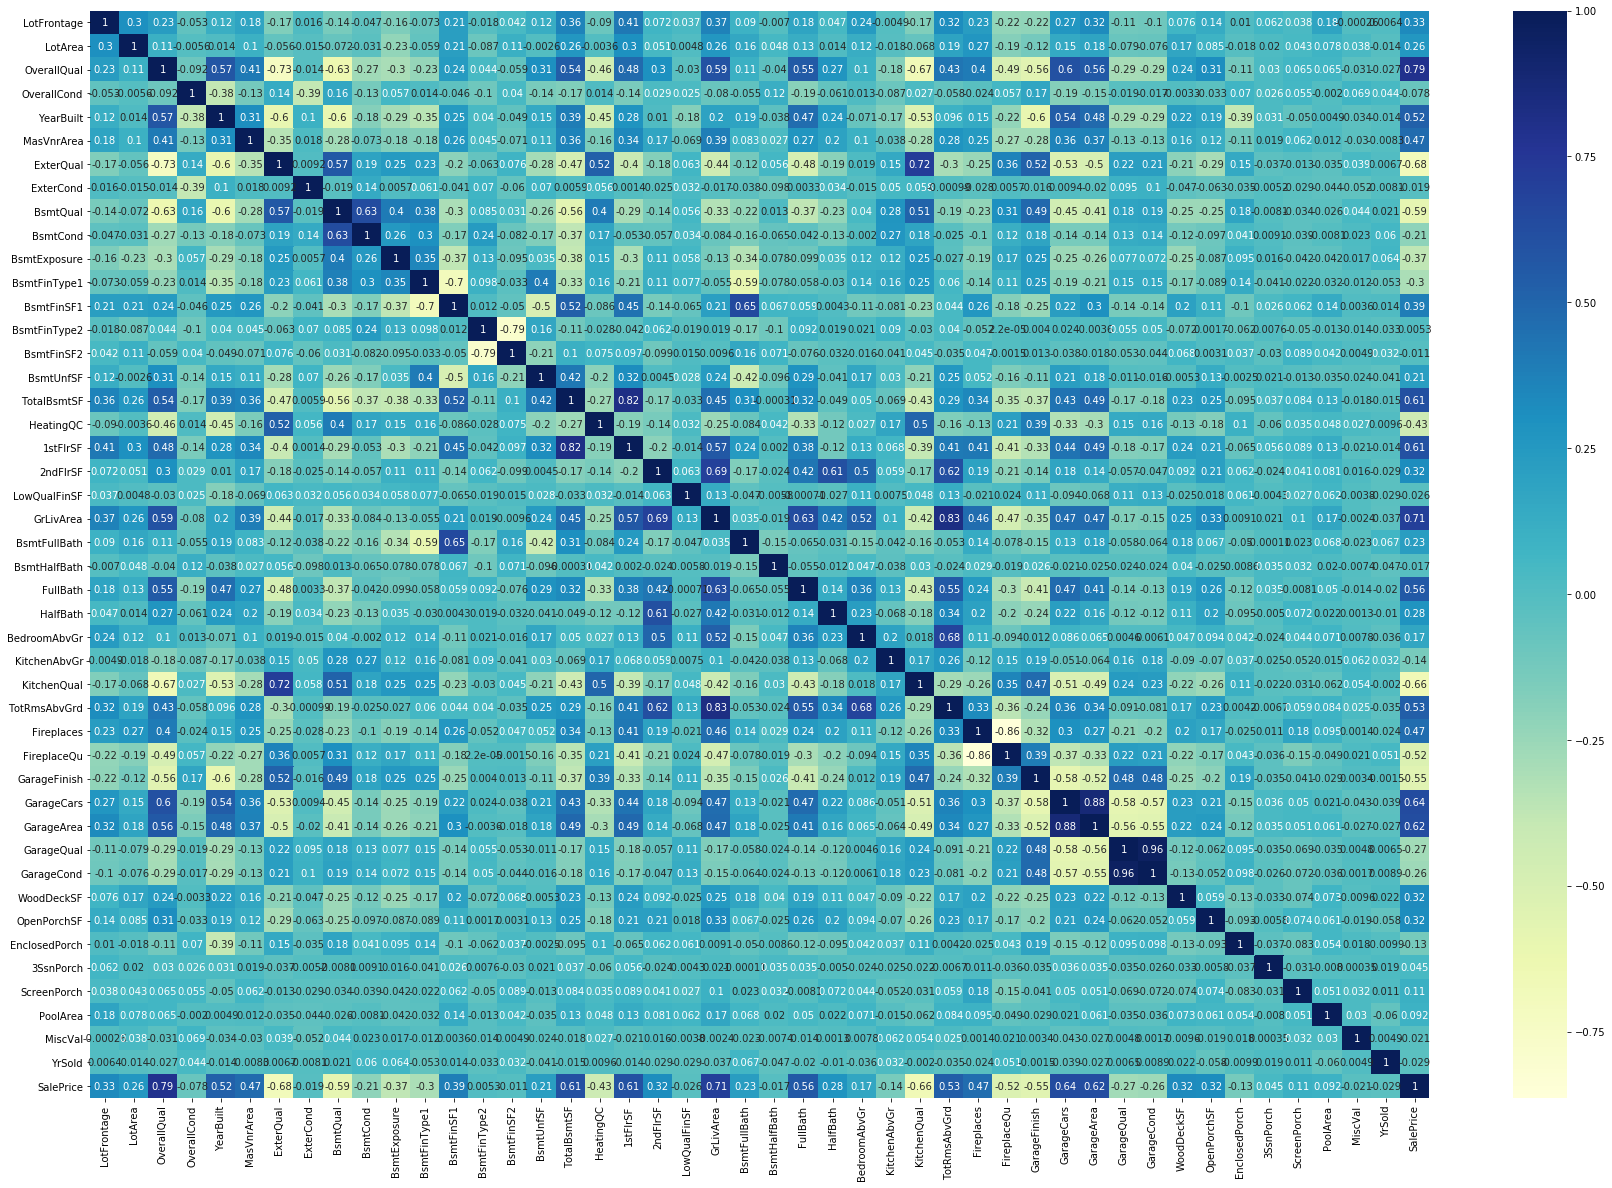

In [1518]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

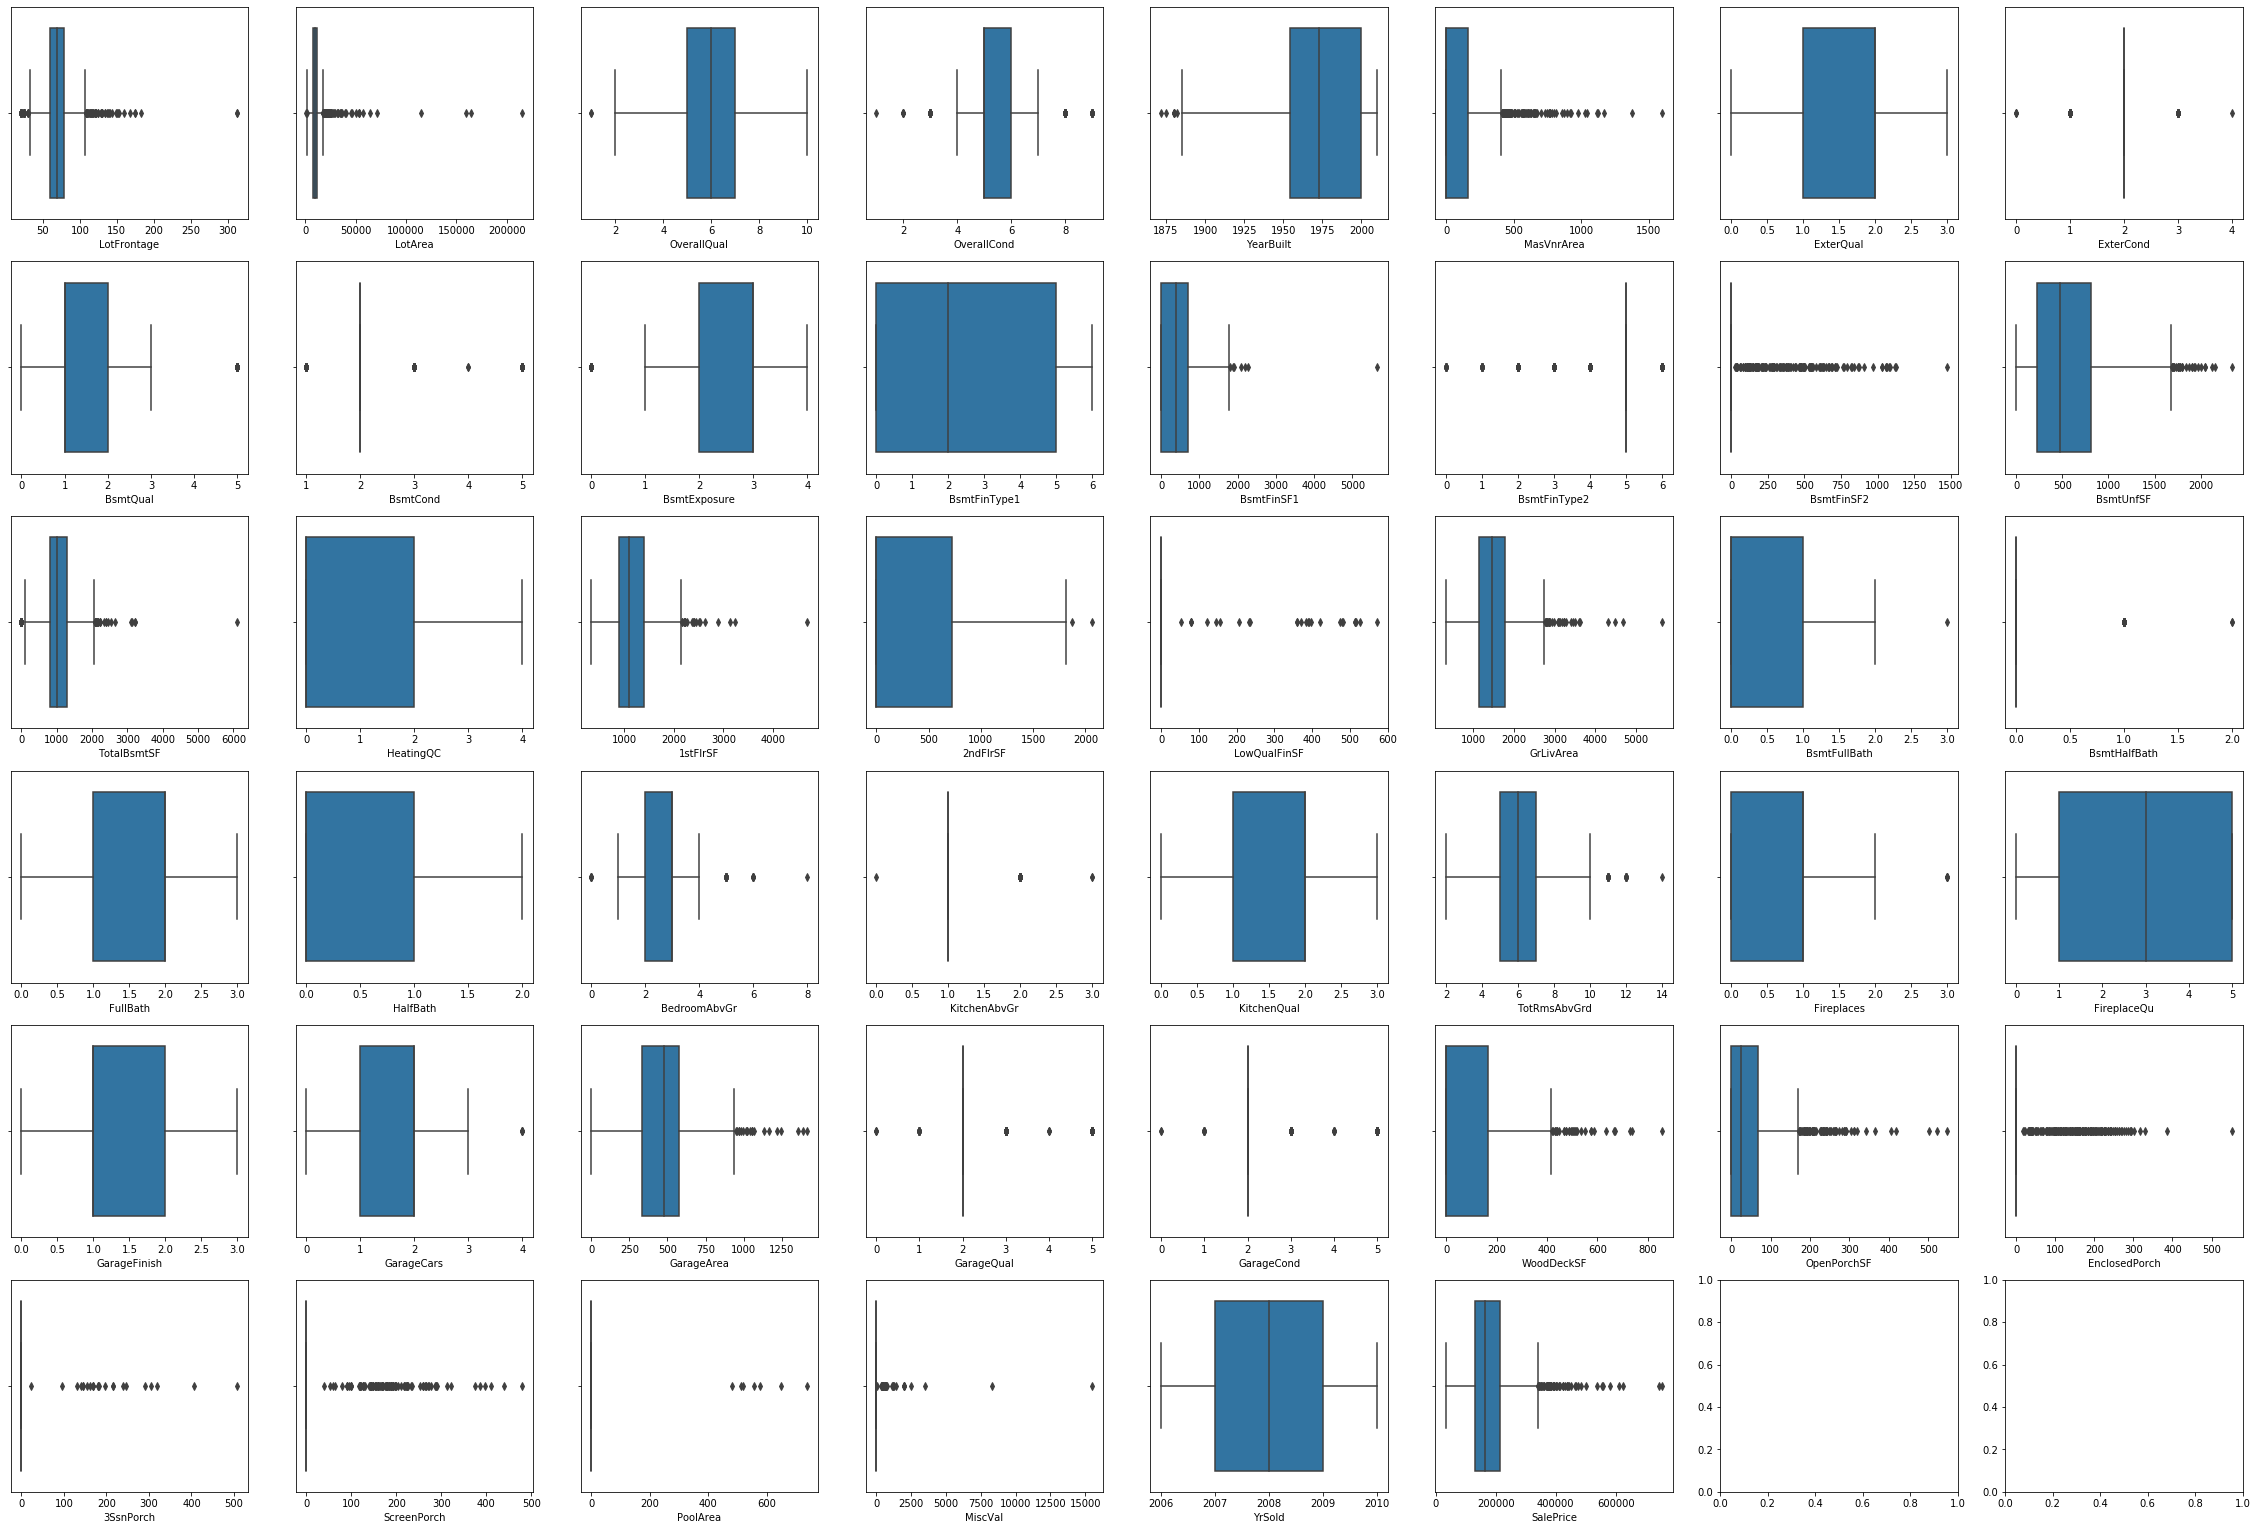

In [1519]:
plt.subplots(6,8,figsize=(40,15))
count = 1
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=None, hspace=None)

for column in numeric.columns:
    
    plt.subplot(6,8, count)
    plt.xlabel(column)
    count=count+1
    sns.boxplot(x=column, data=numeric)

We can see the distribution of the numeric features and the outliers

Creating derived mertics from the date sold and the date built

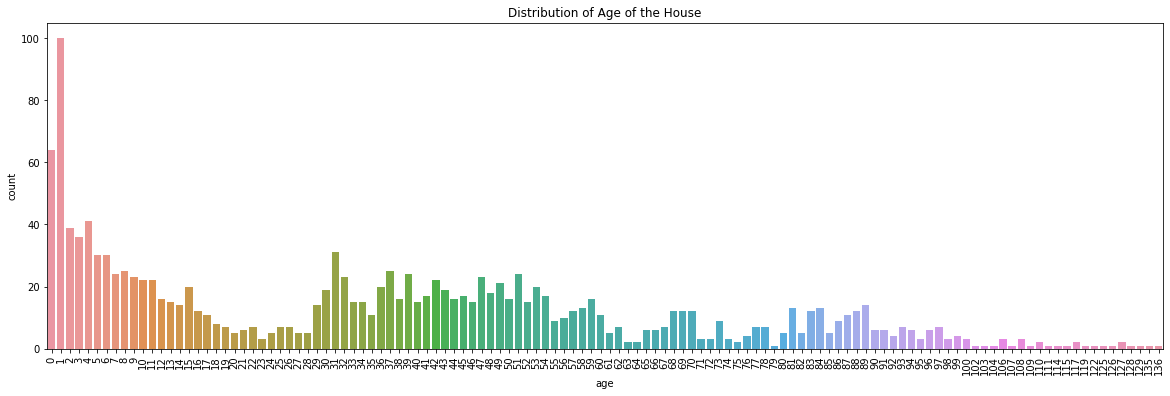

In [1520]:
housing["age"] = housing["YrSold"] - housing["YearBuilt"]
housing.drop(["YrSold", "YearBuilt"], inplace=True, axis=1)
numeric.drop(["YrSold", "YearBuilt"], inplace=True, axis=1)

plt.figure(figsize=(20, 6))
sns.countplot(x="age", data=housing)
plt.xticks(rotation=90)
plt.title("Distribution of Age of the House")
plt.show()


## Preprocessing

### Creating dummies

#### Creating a function to create dummies for a categorical variable column

In [1521]:
def create_dummies_for_column(housing, column_name):
    dummy_frame = pd.get_dummies(housing[column_name], drop_first=True, prefix=column_name)
    housing = pd.concat([housing, dummy_frame], axis=1)
    housing = housing.drop(column_name, axis=1)
    
    return housing

In [1522]:
for column_name in categorical.columns:
    housing = create_dummies_for_column(housing, column_name)

print(housing.shape)
housing.dtypes

(1460, 226)


LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
MasVnrArea               float64
ExterQual                  int64
ExterCond                  int64
BsmtQual                   int64
BsmtCond                   int64
BsmtExposure               int64
BsmtFinType1               int64
BsmtFinSF1                 int64
BsmtFinType2               int64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
HeatingQC                  int64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
KitchenQual                int64
TotRmsAbvGrd               int64
Fireplaces                 int64
FireplaceQ

### Splitting the dataset into train and test

In [1523]:
from sklearn.model_selection import train_test_split

housing_train, housing_test  = train_test_split(housing, train_size=0.7, random_state=100)
print(housing_test.shape)
print(housing_train.shape)

(439, 226)
(1021, 226)


### Checking the distribution of the train and test data 

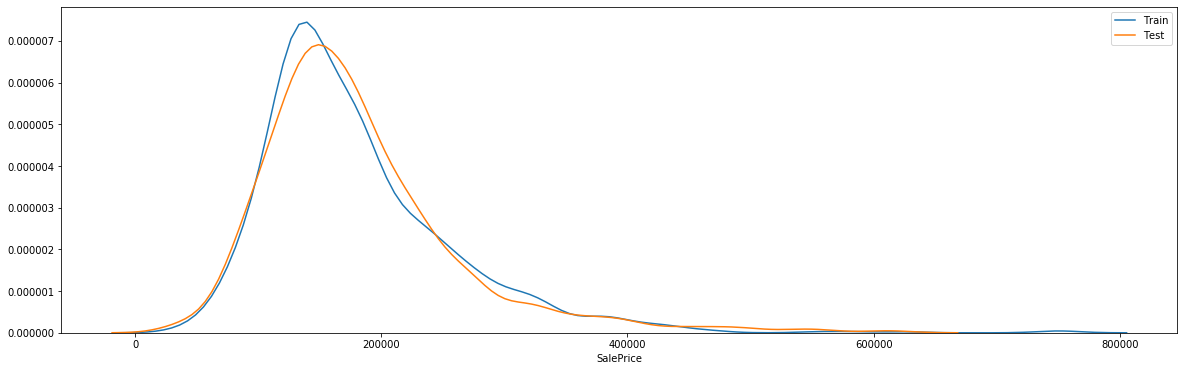

In [1524]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 1, 1)
sns.distplot(housing_train["SalePrice"], hist=False, label="Train")
plt.legend()

plt.subplot(1, 1, 1)
sns.distplot(housing_test["SalePrice"], hist=False, label="Test")
plt.legend()
plt.show()

From the distribution plot we can see that the range of the output variable is greater on the training data than on the test data, so the training data should be able to explain the test data

### Scaling all features on the training data

In [1525]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
housing_train[numeric.columns] = scaler.fit_transform(housing_train[numeric.columns])

In [1526]:
housing_train.head()

ng_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  \
318             0            1           1           0             0   
239             0            1           1           0             0   
986             1            1           1           0             0   
1416            1            1           1           0             0   
390             0            1           0           0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
318              0             1                0                1   
239              0             1                0                0   
986              0             1                0                0   
1416             0             1                0                0   
390              0             1                0                0   

      LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
318                 0                 0                  0              0   
239                 1                 0                  0              0   
986                 1                 0                  0              0   
1416                1                 0                  0              0   
390                 1                 0                  0              0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
318               0                 1              1              0   
239               0                 1              0              0   
986               0                 0              0              0   
1416              0                 1              0              0   
390               0                 1              0              0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
318                      0                    0                     0   
239                      0                    0                     0   
986                      0                    0                     0   
1416                     0                    0                     0   
390                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
318                      0                     0                     0   
239                      0                     0                     0   
986                      0                     0                     0   
1416                     0                     0                     0   
390                      0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
318                      0                     0                    0   
239                      1                     0                    0   
986                      0                     0                    0   
1416                     0                     0                    0   
390                      1                     0                    0   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
318                      0                     0                   0   
239                      0                     0                   0   
986                      0                     0                   0   
1416                     0                     0                   0   
390                      0                     0                   0   

      Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
318                      0                    0                     1   
239                      0                    0                     0   
986                      0                    0                     0   
1416                     0                    0                     0   
390                      0                    0                     0   

      Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
3

### Dividing into X and Y sets for the model building

In [1527]:
y_train = housing_train.pop("SalePrice")
X_train = housing_train

## Recursive Feature Elimination

In [1528]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# using RFE to get our top 30 features
rfe = RFE(lm, 30)
rfe = rfe.fit(X_train, y_train)

# eliminating the remaining columns
X_train = X_train[X_train.columns[rfe.support_]]
# adding the constant to X_train
X_train_lm = sm.add_constant(X_train)


lrm = sm.OLS(y_train, X_train_lm).fit()
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     302.9
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:14   Log-Likelihood:                 1958.8
No. Observations:                1021   AIC:                            -3860.
Df Residuals:                     992   BIC:                            -3717.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.37

## Manual Feature Elimination

Drop "RoofMatl_Metal" and rebuild the model manually

In [1529]:
def execute_linear_regression(X_train, y_train, column_name=None):
    if column_name != None:
        X_train.drop(column_name, axis = 1, inplace=True)
        
    if "const" in X_train:
        X_train.drop("const", axis = 1, inplace=True)

    X_train_lm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_lm).fit()
    print(lm.summary())

    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

    return (X_train_lm, lm)

execute_linear_regression(X_train, y_train, "RoofMatl_Metal")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     313.4
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:14   Log-Likelihood:                 1957.2
No. Observations:                1021   AIC:                            -3858.
Df Residuals:                     993   BIC:                            -3720.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.37

    0             1                      1  
 1191            1             0             0                      0  
 1014            1             0             0                      0  
 1259            1             0             0                      0  
 660             1             0             0                      0  
 403             1             0             0                      0  
 783             1             0             0                      0  
 60              1             0             1                      1  
 357             1             0             0                      0  
 468             1             0             0                      0  
 1213            1             0             0                      0  
 464             1             0             0                      0  
 550             1             0             0                      0  
 1348            1             0             0                      0  
 759             1 

In [1530]:
execute_linear_regression(X_train, y_train, "RoofMatl_Tar&Grv")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     324.7
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:15   Log-Likelihood:                 1955.8
No. Observations:                1021   AIC:                            -3858.
Df Residuals:                     994   BIC:                            -3724.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.36

       0                      0  
 735              0             0                      0  
 70               0             0                      0  
 1311             0             1                      1  
 1145             0             0                      0  
 55               0             0                      0  
 1139             0             0                      0  
 658              0             0                      0  
 1430             0             0                      0  
 867              0             0                      0  
 77               0             0                      0  
 690              0             0                      0  
 1342             0             0                      0  
 974              0             0                      0  
 242              0             0                      0  
 1197             0             0                      0  
 787              0             0                      0  
 35               0   

In [1531]:
execute_linear_regression(X_train, y_train, "RoofMatl_CompShg")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     337.7
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:16   Log-Likelihood:                 1955.3
No. Observations:                1021   AIC:                            -3859.
Df Residuals:                     995   BIC:                            -3730.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.35

0                      0  
 1167             0                      0  
 786              0                      0  
 1417             0                      0  
 894              0                      0  
 1084             0                      0  
 112              1                      1  
 518              0                      0  
 297              0                      0  
 338              0                      0  
 295              0                      0  
 1244             0                      0  
 1338             0                      0  
 245              0                      0  
 115              0                      0  
 961              0                      0  
 453              0                      0  
 523              1                      1  
 1156             0                      0  
 293              0                      0  
 1070             0                      0  
 1138             0                      0  
 1234             0         

In [1532]:
execute_linear_regression(X_train, y_train, "RoofMatl_Membran")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     350.9
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:16   Log-Likelihood:                 1953.8
No. Observations:                1021   AIC:                            -3858.
Df Residuals:                     996   BIC:                            -3734.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.35

           0  
 1291                      0  
 1075                      0  
 1115                      1  
 252                       0  
 501                       0  
 193                       0  
 1157                      0  
 377                       0  
 1294                      0  
 358                       0  
 310                       0  
 203                       0  
 1298                      1  
 349                       1  
 337                       0  
 433                       0  
 1116                      0  
 815                       0  
 312                       0  
 278                       1  
 730                       0  
 921                       0  
 1227                      0  
 623                       0  
 1444                      0  
 319                       0  
 1428                      0  
 1096                      0  
 910                       0  
 334                       0  
 861                       0  
 1440                   

In [1533]:
execute_linear_regression(X_train, y_train, "SaleCondition_Partial")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     350.9
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:17   Log-Likelihood:                 1953.8
No. Observations:                1021   AIC:                            -3858.
Df Residuals:                     996   BIC:                            -3734.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.3578      0.654  

0            1             0             0  
 316          0         0            1             0             0  
 942          0         0            1             0             0  
 1413         0         0            1             0             0  
 326          0         0            1             1             0  
 158          0         0            1             0             0  
 435          0         0            1             0             0  
 1330         0         0            1             0             0  
 456          0         0            1             0             0  
 186          0         0            1             0             0  
 716          0         0            1             0             0  
 657          0         0            1             0             0  
 1289         0         0            1             0             1  
 1191         0         0            1             0             0  
 1014         0         0            1             0      

In [1534]:
execute_linear_regression(X_train, y_train, "GrLivArea")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     350.9
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:18   Log-Likelihood:                 1953.8
No. Observations:                1021   AIC:                            -3858.
Df Residuals:                     996   BIC:                            -3734.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.3611      0.654  

     0             0  
 1019            1             0             0  
 300             1             0             0  
 199             1             0             0  
 678             1             0             1  
 1447            1             0             0  
 284             1             0             0  
 918             1             0             0  
 1000            1             0             0  
 1384            1             0             0  
 421             1             0             0  
 1141            1             0             0  
 720             1             0             0  
 37              1             0             0  
 6               1             0             0  
 937             1             0             0  
 826             1             0             0  
 866             1             0             1  
 1217            1             0             1  
 563             1             0             0  
 400             1             0             0

In [1535]:
execute_linear_regression(X_train, y_train, "PoolQC_None")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     340.8
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:18   Log-Likelihood:                 1920.6
No. Observations:                1021   AIC:                            -3793.
Df Residuals:                     997   BIC:                            -3675.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0115      0.013  

     0  
 1368             0             0  
 47               0             0  
 1243             0             1  
 327              0             0  
 651              0             0  
 795              0             0  
 1162             0             0  
 1066             0             0  
 1317             0             1  
 351              0             0  
 379              0             0  
 396              0             0  
 99               0             0  
 392              0             0  
 579              0             0  
 1402             0             1  
 276              0             0  
 1039             0             0  
 1229             0             0  
 1190             0             0  
 1041             0             0  
 955              0             0  
 430              0             0  
 1331             0             0  
 1102             0             0  
 973              0             1  
 130              0             0  
 1127             0

In [1536]:
execute_linear_regression(X_train, y_train, "PoolQC_3")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     355.8
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:19   Log-Likelihood:                 1919.5
No. Observations:                1021   AIC:                            -3793.
Df Residuals:                     998   BIC:                            -3680.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0125      0.013  

   0  
 1377             0  
 1369             0  
 869              0  
 387              0  
 163              0  
 1264             0  
 739              0  
 522              0  
 61               0  
 136              0  
 149              0  
 1346             0  
 670              0  
 1060             0  
 1131             0  
 81               0  
 1407             0  
 395              0  
 32               0  
 1193             0  
 1087             0  
 1196             1  
 459              0  
 1180             0  
 850              0  
 756              0  
 1185             0  
 827              0  
 714              0  
 363              0  
 121              0  
 637              0  
 445              0  
 1442             0  
 219              1  
 704              0  
 167              1  
 697              0  
 1304             0  
 1452             0  
 1079             0  
 85               0  
 296              0  
 985              0  
 1401             0  
 61

In [1537]:
execute_linear_regression(X_train, y_train, "LowQualFinSF")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     372.2
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:19   Log-Likelihood:                 1918.4
No. Observations:                1021   AIC:                            -3793.
Df Residuals:                     999   BIC:                            -3684.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0120      0.013  

 0  
 303              0               0         0             0             0  
 1032             0               0         0             0             0  
 504              0               0         0             0             0  
 234              0               0         0             0             0  
 663              0               0         0             0             0  
 1169             0               0         0             0             0  
 673              0               0         0             0             0  
 909              0               0         0             0             0  
 586              0               0         0             0             0  
 1063             0               0         0             0             0  
 132              0               0         0             0             0  
 659              0               0         0             0             0  
 1050             0               0         0             0             1  
 1270  

In [1538]:
execute_linear_regression(X_train, y_train, "TotalBsmtSF")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     382.7
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:20   Log-Likelihood:                 1908.6
No. Observations:                1021   AIC:                            -3775.
Df Residuals:                    1000   BIC:                            -3672.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0114      0.012  

           0  
 35                 0         0             0             0  
 598                0         0             0             0  
 507                0         0             0             1  
 410                0         0             0             0  
 761                0         0             0             0  
 854                0         0             0             0  
 352                0         0             0             0  
 1057               0         0             0             0  
 292                0         0             0             0  
 749                0         0             0             0  
 0                  0         0             0             0  
 21                 0         0             0             0  
 1419               0         0             0             0  
 1321               0         0             0             0  
 331                0         0             0             0  
 340                0         0             0          

In [1539]:
execute_linear_regression(X_train, y_train, "BedroomAbvGr")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     395.1
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:20   Log-Likelihood:                 1899.3
No. Observations:                1021   AIC:                            -3759.
Df Residuals:                    1001   BIC:                            -3660.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0024      0.012  

           0  
 35                 0         0             0             0  
 598                0         0             0             0  
 507                0         0             0             1  
 410                0         0             0             0  
 761                0         0             0             0  
 854                0         0             0             0  
 352                0         0             0             0  
 1057               0         0             0             0  
 292                0         0             0             0  
 749                0         0             0             0  
 0                  0         0             0             0  
 21                 0         0             0             0  
 1419               0         0             0             0  
 1321               0         0             0             0  
 331                0         0             0             0  
 340                0         0             0          

In [1540]:
execute_linear_regression(X_train, y_train, "OverallQual")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     351.8
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:20   Log-Likelihood:                 1823.0
No. Observations:                1021   AIC:                            -3608.
Df Residuals:                    1002   BIC:                            -3514.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1158      0.008  

   0  
 1377             0  
 1369             0  
 869              0  
 387              0  
 163              0  
 1264             0  
 739              0  
 522              0  
 61               0  
 136              0  
 149              0  
 1346             0  
 670              0  
 1060             0  
 1131             0  
 81               0  
 1407             0  
 395              0  
 32               0  
 1193             0  
 1087             0  
 1196             1  
 459              0  
 1180             0  
 850              0  
 756              0  
 1185             0  
 827              0  
 714              0  
 363              0  
 121              0  
 637              0  
 445              0  
 1442             0  
 219              1  
 704              0  
 167              1  
 697              0  
 1304             0  
 1452             0  
 1079             0  
 85               0  
 296              0  
 985              0  
 1401             0  
 61

In [1541]:
execute_linear_regression(X_train, y_train, "BsmtQual")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     344.5
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:21   Log-Likelihood:                 1788.3
No. Observations:                1021   AIC:                            -3541.
Df Residuals:                    1003   BIC:                            -3452.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1127      0.008  

   0  
 1377             0  
 1369             0  
 869              0  
 387              0  
 163              0  
 1264             0  
 739              0  
 522              0  
 61               0  
 136              0  
 149              0  
 1346             0  
 670              0  
 1060             0  
 1131             0  
 81               0  
 1407             0  
 395              0  
 32               0  
 1193             0  
 1087             0  
 1196             1  
 459              0  
 1180             0  
 850              0  
 756              0  
 1185             0  
 827              0  
 714              0  
 363              0  
 121              0  
 637              0  
 445              0  
 1442             0  
 219              1  
 704              0  
 167              1  
 697              0  
 1304             0  
 1452             0  
 1079             0  
 85               0  
 296              0  
 985              0  
 1401             0  
 61

In [1542]:
execute_linear_regression(X_train, y_train, "BsmtCond")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     365.1
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:21   Log-Likelihood:                 1786.8
No. Observations:                1021   AIC:                            -3540.
Df Residuals:                    1004   BIC:                            -3456.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1081      0.008  

   0  
 1377             0  
 1369             0  
 869              0  
 387              0  
 163              0  
 1264             0  
 739              0  
 522              0  
 61               0  
 136              0  
 149              0  
 1346             0  
 670              0  
 1060             0  
 1131             0  
 81               0  
 1407             0  
 395              0  
 32               0  
 1193             0  
 1087             0  
 1196             1  
 459              0  
 1180             0  
 850              0  
 756              0  
 1185             0  
 827              0  
 714              0  
 363              0  
 121              0  
 637              0  
 445              0  
 1442             0  
 219              1  
 704              0  
 167              1  
 697              0  
 1304             0  
 1452             0  
 1079             0  
 85               0  
 296              0  
 985              0  
 1401             0  
 61

In [1543]:
execute_linear_regression(X_train, y_train, "LotFrontage")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     382.8
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:21   Log-Likelihood:                 1778.9
No. Observations:                1021   AIC:                            -3526.
Df Residuals:                    1005   BIC:                            -3447.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1148      0.008  

           0  
 35                 0         0             0             0  
 598                0         0             0             0  
 507                0         0             0             1  
 410                0         0             0             0  
 761                0         0             0             0  
 854                0         0             0             0  
 352                0         0             0             0  
 1057               0         0             0             0  
 292                0         0             0             0  
 749                0         0             0             0  
 0                  0         0             0             0  
 21                 0         0             0             0  
 1419               0         0             0             0  
 1321               0         0             0             0  
 331                0         0             0             0  
 340                0         0             0          

In [1544]:
X_train_lrm, lrm = execute_linear_regression(X_train, y_train, "BsmtFinSF1")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     336.0
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:17:22   Log-Likelihood:                 1693.2
No. Observations:                1021   AIC:                            -3356.
Df Residuals:                    1006   BIC:                            -3282.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1271      0.008  

In [1545]:
X_train_copy = X_train_lrm.copy()

## Validation without Regularization

### Distribution of Errors

Text(0.5, 0, 'Errors')

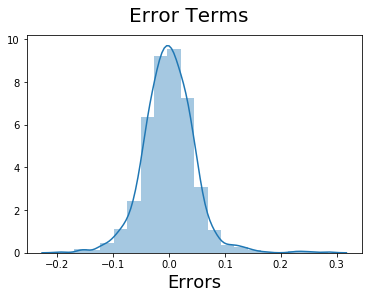

In [1546]:
y_train_pred = lrm.predict(X_train_lrm)

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 18)

The error terms are normally distributed and the mean is at 0

In [1547]:
# Scaling the test dataset
housing_test[numeric.columns] = scaler.transform(housing_test[numeric.columns])

# Splitting into X_test and y_test
y_test = housing_test.pop("SalePrice")
X_test = housing_test

# Add the constant to X_test
X_test = sm.add_constant(X_test)

# Drop the features that were dropped on the training set
X_test = X_test[X_train_lrm.columns]

X_test.head()
y_test_pred = lrm.predict(X_test)


### Plotting Predicted vs. Actual

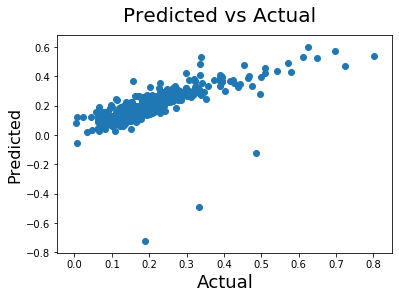

In [1548]:
fig = plt.figure()

plt.scatter(y_test, y_test_pred)
fig.suptitle('Predicted vs Actual', fontsize = 20)
plt.xlabel('Actual', fontsize = 18)
plt.ylabel('Predicted', fontsize = 16)
plt.show()

### Find the R2, RSS, MSE and RMSE

In [1549]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 train: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 test: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print("RSS train: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print("RSS test: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print("MSE train: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print("MSE test: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 train:  0.8238163943161998
R2 test:  0.43856853184489164
RSS train:  2.168337630000912
RSS test:  3.059433690228788
MSE train:  0.0021237391087178376
MSE test:  0.006969097244256921


## Linear Regression

In [1550]:
lm = LinearRegression()

# Drop the constant
X_test.drop("const", inplace=True, axis=1)

# Fit a line
lm.fit(X_train, y_train)

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8238163943161998
0.4385685318448922
2.168337630000912
3.059433690228785
0.0021237391087178376
0.006969097244256914


## Ridge Regularization 

In [1551]:
params = {'alpha': [0.0001, 0.0005, .001, 0.01, 0.05, 0.1, 
 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1552]:
print(model_cv.best_params_)

{'alpha': 0.3}


In [1553]:
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridgecoef = ridge.coef_
print(ridge.coef_)

[ 0.18555251  0.11248611 -0.18893008  0.60957678  0.18533189 -0.1376776
  0.06680966 -0.4547598   0.12723794 -0.07007768 -0.1140155  -0.66507332
  0.09527394  0.03803606]


In [1554]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 train:  0.8157162972566558
R2 test:  0.603717103026281
RSS train:  2.26802763914053
RSS test:  2.159482171255684
MSE train:  0.002221378686719422
MSE test:  0.0049190937841815125


## Lasso Regularization

In [1555]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1556]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1557]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1558]:
lasso.coef_

array([ 0.16521869,  0.10537782, -0.18499882,  0.64550341,  0.1894308 ,
       -0.13761716,  0.05657029, -0.49984641,  0.10978604, -0.        ,
       -0.04967338, -0.77501149,  0.05718455,  0.03766336])

In [1559]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 train:  0.8177107872515346
R2 test:  0.5355677646560335
RSS train:  2.243480930087943
RSS test:  2.530851418622371
MSE train:  0.0021973368561096405
MSE test:  0.005765037400050959


## Validation

In [1560]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.823816          0.815716          0.817711
1   R2 Score (Test)           0.438569          0.603717          0.535568
2       RSS (Train)           2.168338          2.268028          2.243481
3        RSS (Test)           3.059434          2.159482          2.530851
4      RMSE (Train)           0.046084          0.047132          0.046876
5       RMSE (Test)           0.083481          0.070136          0.075928

### Lets observe the changes in the coefficients after regularization


In [1561]:
betas = pd.DataFrame(index=X_test.columns)

betas.rows = X_test.columns

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(68)

Linear     Ridge     Lasso
LotArea           0.208724  0.185553  0.165219
MasVnrArea        0.111969  0.112486  0.105378
ExterQual        -0.179448 -0.188930 -0.184999
1stFlrSF          0.670376  0.609577  0.645503
2ndFlrSF          0.196657  0.185332  0.189431
KitchenAbvGr     -0.148193 -0.137678 -0.137617
PoolArea          0.125045  0.066810  0.056570
Condition2_PosN  -0.626944 -0.454760 -0.499846
RoofMatl_WdShngl  0.125189  0.127238  0.109786
Heating_OthW     -0.093714 -0.070078 -0.000000
Functional_Sev   -0.157999 -0.114016 -0.049673
PoolQC_1         -0.964703 -0.665073 -0.775011
SaleType_Con      0.108291  0.095274  0.057185
SaleType_New      0.041236  0.038036  0.037663

## Subjective Questions

Q1. What will be the changes in the model if you choose to double the value of alpha for both ridge and lasso? 

In [1562]:
alpha = 0.6
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
print(ridge2.coef_)

[ 0.17115785  0.11402698 -0.19523494  0.56682658  0.17729803 -0.12973364
  0.04151722 -0.35454989  0.12572505 -0.05570213 -0.0883841  -0.50455765
  0.08507225  0.03654251]


In [1563]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric4.append(mse_test_lr**0.5)

R2 score_train:  0.8177107872515346
R2 score_test:  0.5355677646560335
RSS score_train:  2.243480930087943
RSS score_test:  2.530851418622371
RMSE score_train:  0.0021973368561096405
RMSE score_test:  0.005765037400050959


In [1564]:
alpha =0.0002
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1565]:
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric5.append(mse_test_lr**0.5)

R2 score_train:  0.8039180784126252
R2 score_test:  0.615459909847438
RSS score_train:  2.413231398521018
RSS score_test:  2.0954915671583545
RMSE score_train:  0.002363595884937334
RMSE score_test:  0.004773329310155705


### Observing the changes

In [1566]:
alpha = pd.DataFrame(index=X_train.columns)
alpha.rows = X_train.columns
alpha['Ridge'] = ridge.coef_
alpha['Ridge2'] = ridge2.coef_
alpha['Lasso'] = lasso.coef_
alpha['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
alpha.head(70)

Ridge    Ridge2     Lasso    Lasso2
LotArea           0.185553  0.171158  0.165219  0.120399
MasVnrArea        0.112486  0.114027  0.105378  0.098247
ExterQual        -0.188930 -0.195235 -0.184999 -0.189309
1stFlrSF          0.609577  0.566827  0.645503  0.622302
2ndFlrSF          0.185332  0.177298  0.189431  0.183629
KitchenAbvGr     -0.137678 -0.129734 -0.137617 -0.127915
PoolArea          0.066810  0.041517  0.056570  0.000000
Condition2_PosN  -0.454760 -0.354550 -0.499846 -0.373559
RoofMatl_WdShngl  0.127238  0.125725  0.109786  0.094323
Heating_OthW     -0.070078 -0.055702 -0.000000 -0.000000
Functional_Sev   -0.114016 -0.088384 -0.049673 -0.000000
PoolQC_1         -0.665073 -0.504558 -0.775011 -0.594986
SaleType_Con      0.095274  0.085072  0.057185  0.005887
SaleType_New      0.038036  0.036543  0.037663  0.034235

In [1567]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

ridge_metric = pd.Series(metric2, name = 'Ridge Regression')
ridge_metric2 = pd.Series(metric4, name = 'Ridge Regression_2')
lasso_metric = pd.Series(metric3, name = 'Lasso Regression')
lasso_metric2 = pd.Series(metric5, name = 'Lasso Regression_2')

final_metric = pd.concat([lr_metric, ridge_metric, ridge_metric2, lasso_metric, lasso_metric2], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Ridge Regression_2  \
0  R2 Score (Train)           0.823816          0.815716            0.817711   
1   R2 Score (Test)           0.438569          0.603717            0.535568   
2       RSS (Train)           2.168338          2.268028            2.243481   
3        RSS (Test)           3.059434          2.159482            2.530851   
4       MSE (Train)           0.046084          0.047132            0.046876   
5        MSE (Test)           0.083481          0.070136            0.075928   

   Lasso Regression  Lasso Regression_2  
0          0.817711            0.803918  
1          0.535568            0.615460  
2          2.243481            2.413231  
3          2.530851            2.095492  
4          0.046876            0.048617  
5          0.075928            0.069089

Q3. After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1568]:
top5 = ['PoolQC_1', '1stFlrSF', 'Condition2_PosN', '2ndFlrSF', 'ExterQual']

X_train_modified = X_train.drop(top5, axis = 1)
X_test_modified = X_test.drop(top5, axis = 1)

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_modified, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1569]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1570]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_modified, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1571]:
y_pred_train = lasso.predict(X_train_modified)
y_pred_test = lasso.predict(X_test_modified)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric6.append(mse_test_lr**0.5)

R2 score_train:  0.35721483690030087
R2 score_test:  0.4340961746061225
RSS score_train:  7.910924809069827
RSS score_test:  3.083805107199753
RMSE score_train:  0.00774821234972559
RMSE score_test:  0.007024613000455018


In [1572]:
gamma = pd.DataFrame(index=X_train_modified.columns)
gamma.rows = X_train_modified.columns
gamma['Lasso'] = lasso.coef_
gamma.head(30)

Lasso
LotArea           0.395528
MasVnrArea        0.363716
KitchenAbvGr     -0.107173
PoolArea          0.129299
RoofMatl_WdShngl  0.173398
Heating_OthW     -0.000000
Functional_Sev   -0.000000
SaleType_Con      0.104082
SaleType_New      0.101988

In [1]:
pip install pydotplus

     |████████████████████████████████| 278 kB 2.4 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=34e1ccad4162cc8de6ded6974bd8ba962bc24ecf01bb3d4e602749d8a3e19ae4
  Stored in directory: /Users/manoharsimons/Library/Caches/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
